$E = m * c^2$
$$
s = \sum_{i=1}^{n}\frac{a}{b}\tag{2}
$$

In [1]:
from numpy import *
import operator,math

def createDataSet():
    group = array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group,labels

# 分类器，输入：分类向量，训练数据，训练数据标签，k近邻
def classify(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    diffMat = tile(inX, (dataSetSize,1)) - dataSet
    sqDiffMat = diffMat**2
    sqDistance = sqDiffMat.sum(axis=1)
    distance = sqDistance**0.5
    sortedDistance = distance.argsort()
    classCount = {}
    for i in range(k):
        voteLabel = labels[sortedDistance[i]]
        classCount[voteLabel] = classCount.get(voteLabel,0) + 1
    sortedClass = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClass[0][0]
    
# group,labels = createDataSet()
# classify([0.3,0.8],group, labels, 3)




In [2]:

def file2matrix(filename):
    fr = open(filename)
    arrayOfLines = fr.readlines()
    numberOfLines = len(arrayOfLines)
    returnMat = zeros((numberOfLines,3))
    classLabelVector = []
    index = 0
    for line in arrayOfLines:
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index,:] = listFromLine[0:3]
        classLabelVector.append(int(listFromLine[-1]))
        index += 1
    return returnMat,classLabelVector
a,b = file2matrix('datingTestSet2.txt')
a

array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
       [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
       [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
       ...,
       [2.6575000e+04, 1.0650102e+01, 8.6662700e-01],
       [4.8111000e+04, 9.1345280e+00, 7.2804500e-01],
       [4.3757000e+04, 7.8826010e+00, 1.3324460e+00]])

[None, None]

[None, None]

[None, None]

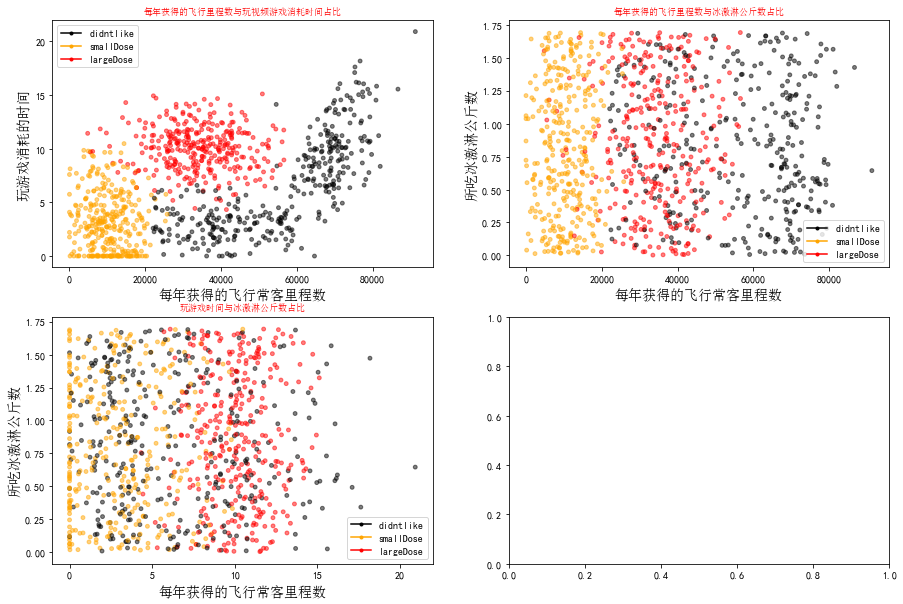

In [3]:
from matplotlib.font_manager import FontProperties
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.lines as mlines
#显示图
%matplotlib inline
mpl.rcParams['font.sans-serif']=['SimHei'] #设置字体
# fig = plt.figure() #创建图
# ax = fig.add_subplot(111) #确定图位置
# plt.xlabel(r'玩游戏所占时间百分比')#设置坐标轴标签
# plt.ylabel(r'每周消费的冰淇淋数')
# ax.scatter(a[:,1], a[:,0], 15.0*array(b), array(b))#(x,y,点大小，点颜色)
# plt.show()
#设置字体
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)
fig,axs = plt.subplots(nrows=2,ncols=2,sharex=False,sharey=False,figsize=(15,10))
numberofLabels = len(b)
LabelColors = []
for i in b:
    if i==1:
         LabelColors.append('black')
    if i==2:
         LabelColors.append('orange')
    if i==3:
         LabelColors.append("red")
            
axs[0][0].scatter(x=a[:,0],y=a[:,1],color=LabelColors,s=15,alpha=0.5)
axs0_title_text=axs[0][0].set_title(u"每年获得的飞行里程数与玩视频游戏消耗时间占比", FontProperties=font)
axs0_xlabel_text=axs[0][0].set_xlabel("每年获得的飞行常客里程数",FontProperties=font)
axs0_ylabel_text=axs[0][0].set_ylabel("玩游戏消耗的时间",FontProperties=font)
plt.setp(axs0_title_text,size=9,weight='bold',color='red')

#画散点图，以数据矩阵的第一列（飞行常客历程）、第三列（冰激淋公斤数）数据话散点图
     #散点大小为15 透明度为0.5
axs[0][1].scatter(x=a[:,0],y=a[:,2],color=LabelColors, s=15,alpha=0.5)
axs0_title_text=axs[0][1].set_title("每年获得的飞行里程数与冰激淋公斤数占比",FontProperties=font)
axs0_xlabel_text=axs[0][1].set_xlabel("每年获得的飞行常客里程数",FontProperties=font)
axs0_ylabel_text=axs[0][1].set_ylabel("所吃冰激淋公斤数",FontProperties=font)
plt.setp(axs0_title_text,size=9,weight='bold',color='red')
#画散点图，以数据矩阵的第二列（玩游戏）、第三列（冰激淋公斤数）数据话散点图
#散点大小为15 透明度为0.5
axs[1][0].scatter(x=a[:,1],y=a[:,2],color=LabelColors,s=15,alpha=0.5)
axs0_title_text=axs[1][0].set_title("玩游戏时间与冰激淋公斤数占比",FontProperties=font)
axs0_xlabel_text=axs[1][0].set_xlabel("每年获得的飞行常客里程数",FontProperties=font)
axs0_ylabel_text=axs[1][0].set_ylabel("所吃冰激淋公斤数",FontProperties=font)
plt.setp(axs0_title_text,size=9,weight='bold',color='red')

#设置图例
didntLike = mlines.Line2D([],[],color='black',marker='.',markersize=6,label='didntlike')
smallDose = mlines.Line2D([],[],color='orange',marker='.',markersize=6,label='smallDose')
largeDose = mlines.Line2D([],[],color='red',marker='.',markersize=6,label='largeDose')

#添加图例
axs[0][0].legend(handles=[didntLike,smallDose,largeDose])
axs[0][1].legend(handles=[didntLike,smallDose,largeDose])
axs[1][0].legend(handles=[didntLike,smallDose,largeDose])

plt.show()

In [4]:
#归一化处理
def autoNorm(dataSet):
    minV = dataSet.min(0)
    maxV = dataSet.max(0)
    ranges = maxV - minV
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - tile(minV, (m, 1))
    normDataSet = normDataSet / tile(maxV, (m, 1))
    return normDataSet, ranges, minV

def datingClassTest():
    hoRatio = 0.2 #选取测试样本的百分比
    datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')
    normMat, ranges, minV = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m * hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        predictClass = classify(normMat[i,:], normMat[numTestVecs:m, :], datingLabels[numTestVecs:m], 3)
        if predictClass != datingLabels[i]: 
            errorCount += 1.0
            print('w')
        print('the classifier came back with: %d, the real answer is %d' % (predictClass, datingLabels[i]))
        
    print("the total error rate is %f" % (errorCount / float(numTestVecs)))
datingClassTest()

the classifier came back with: 3, the real answer is 3
the classifier came back with: 2, the real answer is 2
the classifier came back with: 1, the real answer is 1
the classifier came back with: 1, the real answer is 1
the classifier came back with: 1, the real answer is 1
the classifier came back with: 1, the real answer is 1
the classifier came back with: 3, the real answer is 3
the classifier came back with: 3, the real answer is 3
the classifier came back with: 1, the real answer is 1
the classifier came back with: 3, the real answer is 3
the classifier came back with: 1, the real answer is 1
the classifier came back with: 1, the real answer is 1
the classifier came back with: 2, the real answer is 2
the classifier came back with: 1, the real answer is 1
the classifier came back with: 1, the real answer is 1
the classifier came back with: 1, the real answer is 1
the classifier came back with: 1, the real answer is 1
the classifier came back with: 1, the real answer is 1
the classi

In [5]:
import os,sys
def img2vector(filename):
    returnVec = zeros((1,1024))
    fr = open(filename)
    for i in range(32):
        line = fr.readline()
        for j in range(32):
            returnVec[0, 32 * i + j] = int(line[j])
    return returnVec

def handwritingClassTest():
    hwLabels = []
    trainingFileList = os.listdir('trainingDigits')
    m = len(trainingFileList)
    trainingMat = zeros((m, 1024))
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        hwLabels.append(classNumStr)
        trainingMat[i,:] = img2vector('trainingDigits/%s' % fileNameStr)
    testFileList = os.listdir('testDigits')
    errorCount = 0.0
    mTest = len(testFileList)
    for i in range(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        testMat = img2vector('trainingDigits/%s' % fileNameStr)
        classifyResult = classify(testMat, trainingMat, hwLabels, 3)
        print('the classifier came back with: %d, the real answer is %d' % (classifyResult, classNumStr))
        if classifyResult != classNumStr: 
            errorCount += 1.0
            print(fileNameStr)
    print("the total number of errors is %d" % errorCount)
    print("the total error rate is %f" % (errorCount / float(mTest)))
handwritingClassTest()

the classifier came back with: 0, the real answer is 0
the classifier came back with: 0, the real answer is 0
the classifier came back with: 0, the real answer is 0
the classifier came back with: 0, the real answer is 0
the classifier came back with: 0, the real answer is 0
the classifier came back with: 0, the real answer is 0
the classifier came back with: 0, the real answer is 0
the classifier came back with: 0, the real answer is 0
the classifier came back with: 0, the real answer is 0
the classifier came back with: 6, the real answer is 0
0_17.txt
the classifier came back with: 0, the real answer is 0
the classifier came back with: 0, the real answer is 0
the classifier came back with: 0, the real answer is 0
the classifier came back with: 0, the real answer is 0
the classifier came back with: 0, the real answer is 0
the classifier came back with: 0, the real answer is 0
the classifier came back with: 0, the real answer is 0
the classifier came back with: 0, the real answer is 0
t

the classifier came back with: 1, the real answer is 1
the classifier came back with: 1, the real answer is 1
the classifier came back with: 1, the real answer is 1
the classifier came back with: 1, the real answer is 1
the classifier came back with: 1, the real answer is 1
the classifier came back with: 1, the real answer is 1
the classifier came back with: 1, the real answer is 1
the classifier came back with: 1, the real answer is 1
the classifier came back with: 1, the real answer is 1
the classifier came back with: 1, the real answer is 1
the classifier came back with: 1, the real answer is 1
the classifier came back with: 1, the real answer is 1
the classifier came back with: 1, the real answer is 1
the classifier came back with: 1, the real answer is 1
the classifier came back with: 1, the real answer is 1
the classifier came back with: 1, the real answer is 1
the classifier came back with: 1, the real answer is 1
the classifier came back with: 1, the real answer is 1
the classi

the classifier came back with: 3, the real answer is 3
the classifier came back with: 3, the real answer is 3
the classifier came back with: 3, the real answer is 3
the classifier came back with: 3, the real answer is 3
the classifier came back with: 3, the real answer is 3
the classifier came back with: 3, the real answer is 3
the classifier came back with: 3, the real answer is 3
the classifier came back with: 3, the real answer is 3
the classifier came back with: 3, the real answer is 3
the classifier came back with: 3, the real answer is 3
the classifier came back with: 3, the real answer is 3
the classifier came back with: 3, the real answer is 3
the classifier came back with: 3, the real answer is 3
the classifier came back with: 3, the real answer is 3
the classifier came back with: 3, the real answer is 3
the classifier came back with: 3, the real answer is 3
the classifier came back with: 3, the real answer is 3
the classifier came back with: 3, the real answer is 3
the classi

the classifier came back with: 4, the real answer is 4
the classifier came back with: 4, the real answer is 4
the classifier came back with: 4, the real answer is 4
the classifier came back with: 4, the real answer is 4
the classifier came back with: 4, the real answer is 4
the classifier came back with: 6, the real answer is 4
4_84.txt
the classifier came back with: 4, the real answer is 4
the classifier came back with: 4, the real answer is 4
the classifier came back with: 4, the real answer is 4
the classifier came back with: 4, the real answer is 4
the classifier came back with: 4, the real answer is 4
the classifier came back with: 4, the real answer is 4
the classifier came back with: 4, the real answer is 4
the classifier came back with: 4, the real answer is 4
the classifier came back with: 4, the real answer is 4
the classifier came back with: 4, the real answer is 4
the classifier came back with: 4, the real answer is 4
the classifier came back with: 4, the real answer is 4
t

the classifier came back with: 6, the real answer is 6
the classifier came back with: 6, the real answer is 6
the classifier came back with: 6, the real answer is 6
the classifier came back with: 6, the real answer is 6
the classifier came back with: 6, the real answer is 6
the classifier came back with: 6, the real answer is 6
the classifier came back with: 6, the real answer is 6
the classifier came back with: 6, the real answer is 6
the classifier came back with: 6, the real answer is 6
the classifier came back with: 6, the real answer is 6
the classifier came back with: 6, the real answer is 6
the classifier came back with: 6, the real answer is 6
the classifier came back with: 6, the real answer is 6
the classifier came back with: 6, the real answer is 6
the classifier came back with: 6, the real answer is 6
the classifier came back with: 6, the real answer is 6
the classifier came back with: 6, the real answer is 6
the classifier came back with: 6, the real answer is 6
the classi

the classifier came back with: 7, the real answer is 7
the classifier came back with: 7, the real answer is 7
the classifier came back with: 7, the real answer is 7
the classifier came back with: 7, the real answer is 7
the classifier came back with: 7, the real answer is 7
the classifier came back with: 7, the real answer is 7
the classifier came back with: 7, the real answer is 7
the classifier came back with: 7, the real answer is 7
the classifier came back with: 8, the real answer is 8
the classifier came back with: 8, the real answer is 8
the classifier came back with: 8, the real answer is 8
the classifier came back with: 8, the real answer is 8
the classifier came back with: 8, the real answer is 8
the classifier came back with: 8, the real answer is 8
the classifier came back with: 8, the real answer is 8
the classifier came back with: 8, the real answer is 8
the classifier came back with: 8, the real answer is 8
the classifier came back with: 8, the real answer is 8
the classi

the classifier came back with: 9, the real answer is 9
the classifier came back with: 9, the real answer is 9
the classifier came back with: 9, the real answer is 9
the classifier came back with: 9, the real answer is 9
the classifier came back with: 9, the real answer is 9
the classifier came back with: 9, the real answer is 9
the classifier came back with: 9, the real answer is 9
the classifier came back with: 9, the real answer is 9
the classifier came back with: 9, the real answer is 9
the classifier came back with: 9, the real answer is 9
the classifier came back with: 9, the real answer is 9
the classifier came back with: 9, the real answer is 9
the classifier came back with: 9, the real answer is 9
the classifier came back with: 9, the real answer is 9
the classifier came back with: 9, the real answer is 9
the classifier came back with: 9, the real answer is 9
the classifier came back with: 9, the real answer is 9
the classifier came back with: 9, the real answer is 9
the classi